In [1]:
# В данном примере будет сделана нейросеть которая будет предсказывать какая вещь изображена на фото.
# Используется датасет fashion mnist - 60000 фото - 28 х 28 пикселей
# Точность 87 - 88.6 %

# Импорт библиотек и классов

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix

In [2]:
fashion = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion.load_data()

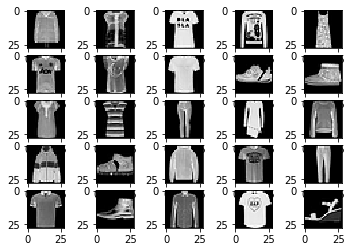

In [4]:
# Визуализация нашего датасета

fig, axs= plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(x_train[np.random.randint(0, len(x_train))], cmap = plt.cm.gray)

In [5]:
# Пеобразование данных в значения от 0 - 1

x_train, x_test = x_train / 255.0, x_test/255.0

In [6]:
# Кол-во уникальных целевых данных

k = len(set(y_train))

In [7]:
# Дбавляем новое измерение в размерность наших данных в данном случае это канал цвета

x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [8]:
# Создание нашей модели

i = Input(shape = (x_train[0].shape))                           # Слой ввода
x = Conv2D(32, (3,3), strides= 2, activation= 'relu')(i)        # Сверточный слой - 32 карты признаков, берем каждый второй пиксель
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)      # Сверточный слой - 64 карты признаков, берем каждый второй пиксель
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)     # Сверточный слой - 128 карты признаков, берем каждый второй пиксель
x = Flatten()(x)                                                # Преобразование данных в вектор данных
x = Dropout(0.2)(x)                                             # Каждые 2 из 10 нейронов отключаем, т. о. предотвращаем переобучение
x = Dense(56, activation='relu')(x)                             # Полносвязный слой - 56 нейронов функция активации при которой отрицательные значения приравниваются к нулю
x = Dense(k, activation = 'softmax')(x)                         # Полносвязный слой - 10 нейронов - т.к у нас 10 уникальных токенов целевых данных 

In [9]:
model = Model(i, x)  # Все соединяем

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.2759 - accuracy: 0.8978 - val_loss: 0.3178 - val_accuracy: 0.8752


In [50]:
# Предсказываем метки наших тестовых данных, так же смотрим какое кол-во меток наша модель предсказала правильно, а
# какое не правильно, так же выведем кол-во правильно и непрвильно квалифицированных меток 

targets_class = np.unique(y_test)
preds = model.predict(x_test)
pred_list = []
count_valid = 0
count_non_valid = 0
for num, (i, j) in enumerate(zip(preds, y_test)):
    if np.argmax(i) == j:
        count_valid += 1
        pred_list.append(True)
    else:
        pred_list.append(False)
        count_non_valid +=1
    #print('Predict = {}, goal = {}'.format(np.argmax(i), j))
print(f'Valid = {count_valid}, non_valid = {count_non_valid}, mean = {sum(pred_list) / len(pred_list)} %')

Valid = 8752, non_valid = 1248, mean = 0.8752 %


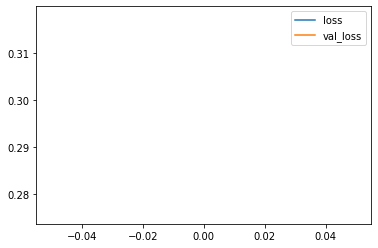

In [51]:
# Визуалиация потерь

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

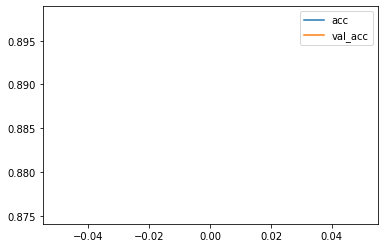

In [52]:
# Визуализация точности

plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()